2.1 2.0 2.7030958622


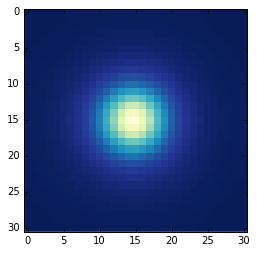

In [1]:
# SIMPLE ANNOTATED GALSIM QUICK EXAMPLE RELEVANT TO LCOGT ANALYSIS
%matplotlib inline

import numpy as np
import galsim

# PIXEL ARRAY SIZE
xsize=31
ysize=31
# PIXEL SCALE IN arcsecond / pixel (typical value for LCOGT)
pixel_scale=0.385

flux = 1.e5 # I have to check what units this is in.

# PSF Parameters (the scale is arcseconds, not pixels!)
alpha = 2.1
beta = 2.0
fwhm = alpha*2.*np.sqrt(2.**(1./beta)-1.)

print alpha, beta, fwhm

#create star image
image = galsim.ImageF(xsize, ysize, init_value=0, scale=pixel_scale) #work in arcseconds, not pixels!
# create a Moffat profile
profile = galsim.Moffat(flux=flux, beta=beta, fwhm=fwhm, trunc=xsize*1)
# shift the profile. Note: the shift is in arcseconds, not pixels!
profile = profile.shift(-0.12, 0)


# draw the Moffat profile onto the image
profile.drawImage(image)

import pylab as plt

plt.imshow(image.array, interpolation='none', cmap='YlGnBu_r')
#plt.colorbar()


0.75 2.0 0.965391379358


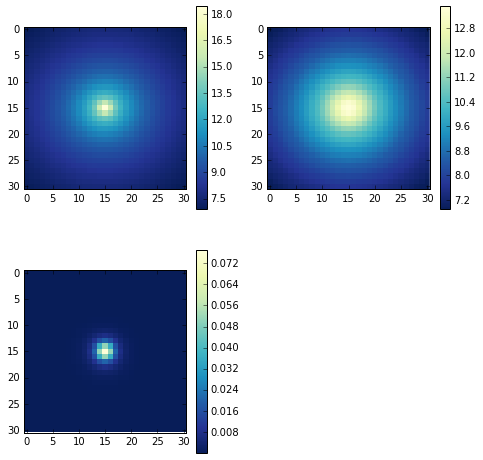

In [2]:
# SIMPLE ANNOTATED GALSIM QUICK EXAMPLE RELEVANT TO LCOGT ANALYSIS
%matplotlib inline

import numpy as np
import galsim

# PIXEL ARRAY SIZE
xsize=31
ysize=31
# PIXEL SCALE IN arcsecond / pixel (typical value for LCOGT)
pixel_scale=0.385

flux = 1.e5 # I have to check what units this is in.

# PSF Parameters (the scale is arcseconds, not pixels!)
alpha = 0.75
beta = 2.0
fwhm = alpha*2.*np.sqrt(2.**(1./beta)-1.)

print alpha, beta, fwhm

#create star image
image = galsim.ImageF(xsize, ysize, init_value=0, scale=pixel_scale) #work in arcseconds, not pixels!
image2 = galsim.ImageF(xsize, ysize, init_value=0, scale=pixel_scale) #work in arcseconds, not pixels!
image3 = galsim.ImageF(xsize, ysize, init_value=0, scale=pixel_scale) #work in arcseconds, not pixels!
# create a Moffat profile
profile = galsim.DeVaucouleurs(flux=flux,scale_radius=1.5, trunc=xsize*1)
psf     = galsim.Moffat(beta=beta, fwhm=fwhm, trunc=xsize*1)
e = 0.09
gal_PA = 174.8
profile = profile.shear(e=e, beta=gal_PA*galsim.degrees)
#profile = galsim.Moffat(flux=flux, beta=beta, fwhm=fwhm)
# shift the profile. Note: the shift is in arcseconds, not pixels!
profile = profile.shift(0., 0)

conv_profile = galsim.Convolve([psf,profile])
#conv_profile = galsim.Convolve([psf,profile], real_space = True)

# draw the Moffat profile onto the image
profile.drawImage(image)
conv_profile.drawImage(image2)
psf.drawImage(image3)

import pylab as plt
plt.figure(1, figsize=(8,8))
plt.subplot(221)
plt.imshow(image.array, interpolation='none', cmap='YlGnBu_r')
plt.colorbar()
plt.subplot(222)
plt.imshow(image2.array, interpolation='none', cmap='YlGnBu_r')
plt.colorbar()
plt.subplot(223)
plt.imshow((image3.array), interpolation='none', cmap='YlGnBu_r')
plt.colorbar()


0.8 2.0 1.02975080465


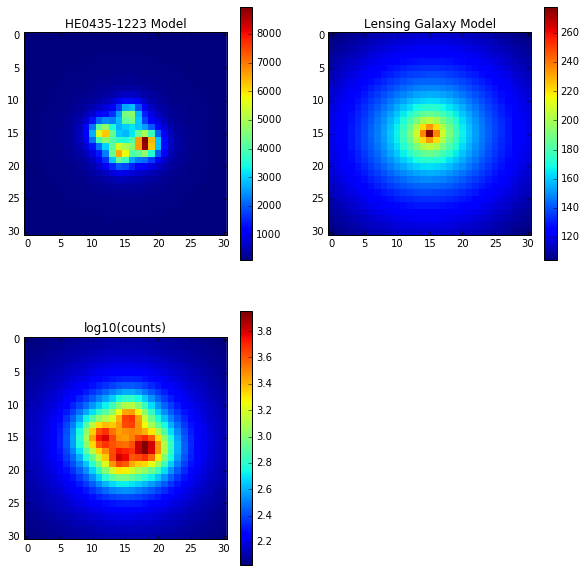

In [6]:
# SIMPLE ANNOTATED GALSIM QUICK EXAMPLE RELEVANT TO LCOGT ANALYSIS
%matplotlib inline

def mag_to_flux(m, m0):

    # convert magnitude to flux
    f = 10**(-0.4*(m - m0))
    
    return int(f)

import numpy as np
import galsim

# PIXEL ARRAY SIZE
xsize=31
ysize=31
# PIXEL SCALE IN arcsecond / pixel (typical value for LCOGT)
pixel_scale=0.385

trunc_size = xsize*pixel_scale
flux = 1.e5 # I have to check what units this is in.

# PSF Parameters (the scale is arcseconds, not pixels!)
alpha = 0.8
beta = 2.0
fwhm = alpha*2.*np.sqrt(2.**(1./beta)-1.)

print alpha, beta, fwhm

#create star image
image = galsim.ImageF(xsize, ysize, init_value=1000, scale=pixel_scale) #work in arcseconds, not pixels!
image2 = galsim.ImageF(xsize, ysize, init_value=1000, scale=pixel_scale) #work in arcseconds, not pixels!
#profile = galsim.Moffat(flux=flux, beta=beta, fwhm=fwhm)
# shift the profile. Note: the shift is in arcseconds, not pixels!
m0 = 30
flux1 = mag_to_flux(17.2, m0)
flux2 = mag_to_flux(17.69, m0)
flux3 = mag_to_flux(17.69, m0)
flux4 = mag_to_flux(17.95, m0)
fluxG = mag_to_flux(16.2, m0)
q1_profile = galsim.Moffat(flux=flux1, beta=beta, fwhm=fwhm, trunc=trunc_size)
q2_profile = galsim.Moffat(flux=flux2, beta=beta, fwhm=fwhm, trunc=trunc_size)
q3_profile = galsim.Moffat(flux=flux3, beta=beta, fwhm=fwhm, trunc=trunc_size)
q4_profile = galsim.Moffat(flux=flux4, beta=beta, fwhm=fwhm, trunc=trunc_size)
# shift the profile. Note: the shift is in arcseconds, not pixels!
q1_profile = q1_profile.shift(0., 0)
q2_profile = q2_profile.shift(-1.4743, +0.5518)
q3_profile = q3_profile.shift(-2.4664, -0.6022)
q4_profile = q4_profile.shift(-0.9378, -1.6160)

psf = galsim.Moffat(beta=beta, fwhm=fwhm, trunc=xsize*1)
gal_profile = galsim.DeVaucouleurs(flux=fluxG,scale_radius=1.5, trunc=trunc_size)
#gal_profile = galsim.Convolve([psf,gal_profile])

e = 0.09
gal_PA = 174.8
gal_profile = gal_profile.shear(e=e, beta=gal_PA*galsim.degrees)
#profile = galsim.Moffat(flux=flux, beta=beta, fwhm=fwhm)
# shift the profile. Note: the shift is in arcseconds, not pixels!
gal_profile = gal_profile.shift(-1.1706, -0.5665)


list_of_profiles = [q1_profile, q2_profile, q3_profile, q4_profile, gal_profile]
field = galsim.Sum(list_of_profiles)

# SHIFT TO THE CENTER
field = field.shift(1.1706, 0.5665)
gal_profile = gal_profile.shift(1.1706, 0.5665)

# draw the Moffat profile onto the image
field.drawImage(image)
gal_profile.drawImage(image2)
model = image.array
model += 0
import pylab as plt

plt.figure(1, figsize=(10,10))
plt.subplot(221)
plt.imshow(model, interpolation='none')
plt.colorbar()
plt.title('HE0435-1223 Model')
plt.subplot(222)
plt.imshow(image2.array, interpolation='none')
plt.colorbar()
plt.title('Lensing Galaxy Model')
plt.subplot(223)
plt.imshow(np.log10(model), interpolation='none')
plt.title('log10(counts)')
plt.colorbar()


In [ ]:
import sys
import os
import math
import numpy as np
from astropy.io import fits
from astropy.table import Table
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle
import matplotlib.pyplot as plt
import galsim
%matplotlib inline

In [ ]:
def mag_to_flux(m, m0):

    # convert magnitude to flux
    f = 10**(-0.4*(m - m0))
    
    return int(f)

In [ ]:
def make_profile(object_row, light_row):
    '''
    This function takes a row from a table of object parameters, and a row from the light curve
    table, and returns a GalSim object profile
    '''
    
    # get the object position from the table
    obj_position = SkyCoord(ra=Angle(object_row['RA'], unit=u.hourangle),
                            dec=Angle(object_row['DEC'], unit=u.degree))
    # find the offset from center
    # the coordinates of the image center, center_dd, is a global variable
    # that is read from the observational parameters file
    dx_deg = obj_position.ra.deg - center_dd.ra.deg
    dy_deg = obj_position.dec.deg - center_dd.dec.deg
    # convert degrees to arcseconds
    dx_arcsec = dx_deg * 3600
    dy_arcsec = dy_deg * 3600
        
    # determine the flux
    # the reference objects have a magnitude column in their table
    if 'mag' in object_row.colnames:
        flux = mag_to_flux(object_row['mag'], m0)
        # print object_row['object'], ': ', flux
    # otherwise get the magnitude from the light-curve table
    else:
        flux = mag_to_flux(light_row[object_row['object']], m0)
        # print object_row['object'], ': ', flux
            
    # assign ellipticity and position angle
    e = object_row['e']
    PA = galsim.Angle(object_row['PA'], galsim.degrees)
        
    # check for the object profile, and assign the relevant parameters
    if object_row['profile'] == 'Gaussian':
        # assign the parameters to variables
        sigma = object_row['par_1']
        fwhm = object_row['par_2']
        half_light = object_row['par_3']
        # use the first parameter provided
        if sigma != '':
            profile = galsim.Gaussian(flux=flux, sigma=float(sigma))
        elif fwhm != '':
            profile = galsim.Gaussian(flux=flux, fwhm=float(fwhm))
        else:
            profile = galsim.Gaussian(flux=flux, half_light_radius=float(half_light))
    
    if object_row['profile'] == 'Moffat':
        # assign the parameters to variables
        beta = object_row['par_1']
        fwhm = object_row['par_2']
        half_light = object_row['par_3']
        # use the first parameter provided (after beta, which is required)
        if fwhm != '':
            profile = galsim.Moffat(flux=flux, beta=float(beta), fwhm=float(fwhm))
        else:
            profile = galsim.Moffat(flux=flux, beta=float(beta), half_light_radius=float(half_light))
            
    if object_row['profile'] == 'Sersic':
        # assign the parameters to variables
        index = object_row['par_1']
        half_light = object_row['par_2']
        trunc = object_row['par_3']
        # index and half_light are required parameters, trunc is not required
        if trunc == '':
            profile = galsim.Sersic(flux=flux, n=float(index), half_light_radius=float(half_light))
            # gsparams=big_fft_params, if necessary
        else:
            profile = galsim.Sersic(flux=flux, n=float(index), half_light_radius=float(half_light),
                                    trunc=float(trunc))
        
    if object_row['profile'] == 'deVaucouleurs':
        # assign the parameters to variables
        half_light = object_row['par_1']
        trunc = object_row['par_2']
        # create the profile
        if trunc == '':
            profile = galsim.DeVaucouleurs(flux=flux, half_light_radius=float(half_light))
            # gsparams=big_fft_params, if necessary
        else:
            profile = galsim.DeVaucouleurs(flux=flux, half_light_radius=float(half_light),
                                           trunc = float(trunc))

    # apply the ellipticity and rotation
    profile = profile.shear(e=e, beta=PA)
        
    # apply the offset, must take the negative of RA or else the image is inverted left to right
    profile = profile.shift(-dx_arcsec, dy_arcsec)
    
    return profile

In [ ]:
# read observational parameters from file 'observ_par.txt' into a dictionary

with open('observ_par.txt', 'r') as f:
    read_data = f.readlines()
    
observ_parameters = {}

for line in read_data:
    # any line in the parameters file that does not contain a '=' will be skipped
    if line.find('=') != -1:
        parameter, value = line.split('=')
        # strip off the \n
        value = value[:-1]
        # strip off the comment, if there is one
        if value.find('#') != -1:
            value = value[:(value.index('#') - 1)]
        # append parameter to dictionary
        observ_parameters[parameter] = value

In [ ]:
# read variable object parameters into an astropy table

var_object_parameters = Table.read('var_obj_par.csv', format = 'ascii.csv',
                                   names = ('object','RA','DEC','profile',
                                            'par_1','par_2','par_3','e','PA'))

In [ ]:
# read reference object parameters into an astropy table

ref_object_parameters = Table.read('ref_obj_par.csv', format = 'ascii.csv',
                                   names = ('object','RA','DEC','profile',
                                            'par_1','par_2','par_3','e','PA','mag'))

In [ ]:
# read mjd and magnitudes from light-curve table, he0435-1223_lcogt_magnitudes.dat

light_curve_table = Table.read('he0435-1223_lcogt_magnitudes.dat', format = 'ascii', delimiter = ' ',
                               names = ('mjd','A','A_err','B','B_err','C','C_err','D','D_err'))

In [ ]:
# assign observational parameter values

pixel_scale = float(observ_parameters['pixel_scale'])  # arcsec/pixel
xsize = int(observ_parameters['img_size'])             # pixel
ysize = int(observ_parameters['img_size'])             # pixel
exp = int(observ_parameters['exp'])                    # exposure time [s]

# image center, RA DEC in decimal degrees
center_dd = SkyCoord(observ_parameters['img_center'], unit=(u.hourangle, u.deg))

# GalSim FFT parameters need to be increased if a truncation radius is not specified for the
# de Vaucouleurs or Sersic galaxy profiles; big_fft_params must be included as a parameter when
# these profiles are constructed below, and also when the profiles are added.
# big_fft_params = galsim.GSParams(maximum_fft_size=10240)

# random seed for the Poisson Noise below
random_seed = 1534225

m0 = 30.2 # magnitude of the zeropoint, probably should be read from a table
sky_level = 300 # ADU/pixel

In [ ]:
# draw the objects

counter = 0

# the images are saved in a list, and written to a single data cube
# in addition to being written as individual FITS files
images = []

# we open just one figure, and then clear its contents after every loop
# otherwise we get a 'Too many files open' error, even when we conscientiously close the figures
fig = plt.figure(figsize=(5, 5))

for light_row in light_curve_table:
    
    # set the image size (this must be within the loop in order to create the data cube)
    image = galsim.ImageF(xsize, ysize)
    
    # all the profiles are stored in a list, then summed at the end of the loop
    profiles = []

    # add all the variable objects
    for object_row in var_object_parameters:
        
        #make the profile
        profile = make_profile(object_row, light_row)
        # append to the list of profiles
        profiles.append(profile)

    # add all the reference objects
    for object_row in ref_object_parameters:
    
        #make the profile
        profile = make_profile(object_row, light_row)
        # append to the list of profiles
        profiles.append(profile)
        
    # sum the profiles
    field = galsim.Sum(profiles) # gsparams=big_fft_params, if necessary
    
    # draw the image
    field.drawImage(image, scale=pixel_scale)

    # add sky noise
    rng = galsim.BaseDeviate(random_seed)
    noise = galsim.PoissonNoise(rng, sky_level=sky_level)
    image.addNoise(noise)
    
    # collect the images in a list in order to write them to a data cube
    # in addition to writing them as individual files
    images.append(image)
    
    mjd = float(light_row['mjd'])
    counter += 1

    # create output folder for the FITS files
    if not os.path.isdir('fits_output'):
        os.mkdir('fits_output')
        
    # create output folder for the PNG files
    if not os.path.isdir('png_output'):
        os.mkdir('png_output')
    
    # determine FITS file name
    if counter < 10:
        fits_file_name = os.path.join('fits_output','HE0435-1223_00%d.fits'%counter)
    elif counter >= 10 and counter < 100:
        fits_file_name = os.path.join('fits_output','HE0435-1223_0%d.fits'%counter)
    elif counter >= 100:
        fits_file_name = os.path.join('fits_output','HE0435-1223_%d.fits'%counter)
   
    # write the FITS image
    image.write(fits_file_name)
        
    # determine the PNG file name
    if counter < 10:
        png_file_name = os.path.join('png_output','HE0435-1223_00%d.png'%counter)
    elif counter >= 10 and counter < 100:
        png_file_name = os.path.join('png_output','HE0435-1223_0%d.png'%counter)
    elif counter >= 100:
        png_file_name = os.path.join('png_output','HE0435-1223_%d.png'%counter)
    
    # get hdu from the file
    # using 'update' mode writes the updates automatically with hdulist.close()
    hdulist = fits.open(fits_file_name, mode='update')
    data = hdulist[0].data
    
    # add header info    
    hdulist[0].header['MJD-OBS'] = mjd
    hdulist[0].header['EXPTIME'] = exp

    # plot and write the png image
    im = plt.imshow(data, cmap="gray", interpolation='none', origin='lower left')
    # plt.colorbar()
    fig.savefig(png_file_name, dpi=50)
    # clear the contents of the figure without closing it; remember we are recycling the same
    # figure, just clearing the contents every time
    plt.clf() 
    hdulist.close() # writes the updates to the file
    
# data cube file name
cube_file_name = os.path.join('fits_output','HE0435-1223_multi.fits')    

# write the images to a FITS data cube
galsim.fits.writeMulti(images, cube_file_name)

# make an animated gif, requires ImageMagick
os.system('convert -delay 30 -loop 0 png_output/*.png HE0435-1223.gif')